In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Train/Test Split

In [18]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("cleaned_dataset.csv")

df = df[df["Open"] == 1]

df
# X = df.drop(["Sales", "Date"], axis=1)
# y = df["Sales"]

# split_index = int(len(df) * 0.8)
# X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
# y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,WeekOfYear,DayOfYear,CompetitionOpenDate,DaysSinceCompetitionOpen,IsPromoMonth,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,0,1,1270.0,...,31,212,2008-09-01,2524,0,False,True,False,False,False
1,2,5,2015-07-31,6064,625,1,1,0,1,570.0,...,31,212,2007-11-01,2829,1,False,False,False,False,False
2,3,5,2015-07-31,8314,821,1,1,0,1,14130.0,...,31,212,2006-12-01,3164,1,False,False,False,False,False
3,4,5,2015-07-31,13995,1498,1,1,0,1,620.0,...,31,212,2009-09-01,2159,0,False,True,False,False,True
4,5,5,2015-07-31,4822,559,1,1,0,1,29910.0,...,31,212,2015-04-01,121,0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,150.0,...,1,1,2006-09-01,2314,0,True,False,False,False,False
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,860.0,...,1,1,1999-10-01,4841,0,True,False,False,True,False
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,840.0,...,1,1,2010-01-01,1096,1,True,False,False,True,False
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1430.0,...,1,1,2010-01-01,1096,0,True,False,False,True,False


In [19]:

# Fixing PromoInterval
def is_promo_month(row):
    if row['Promo2'] == 0 or pd.isna(row['PromoInterval']) or row['PromoInterval'] == '0':
        return 0
    months = row['PromoInterval'].split(',')
    return 1 if row['MonthName'] in months else 0

df['MonthName'] = df['Month'].apply(lambda x: ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][x-1])

df['IsPromoMonth'] = df.apply(is_promo_month, axis=1)

df = df.drop(columns=['PromoInterval'])


### Models for Day 4
- Linear Regression
- HistGradientBoostingRegressor
- XGBoostRegressor

In [20]:
df.dtypes

obj_cols = df.select_dtypes(include='object').columns
print("Dropping object columns:", obj_cols.tolist())

df = df.drop(columns=obj_cols)

print(df.dtypes)


Dropping object columns: ['Date', 'CompetitionOpenDate', 'MonthName']
Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
Year                           int64
Month                          int64
Day                            int64
WeekOfYear                     int64
DayOfYear                      int64
DaysSinceCompetitionOpen       int64
IsPromoMonth                   int64
StoreType_b                     bool
StoreType_c                     bool
StoreType_d                     bool
Assortment_b                    bool
Assor

In [21]:
y = df['Sales']
X = df.drop(columns=['Sales'])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression



def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    return rmse, mae

# ---- Linear Regression ----
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

lr_rmse, lr_mae = evaluate(lr, X_test, y_test)
print("Linear Regression → RMSE:", lr_rmse, " MAE:", lr_mae)

print(f"training score is {round(lr.score(X_train,y_train)*100, 2)}%")
print(f"testing score is {round(lr.score(X_test,y_test)*100, 2)}%")


Linear Regression → RMSE: 1295.091296003731  MAE: 940.4434435678795
training score is 82.7%
testing score is 82.61%


In [37]:

from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(
    max_depth=10,
    learning_rate=0.05,
    random_state=42
)

model.fit(X_train, y_train)

model_preds = model.predict(X_test)

model_rmse, model_mae = evaluate(model, X_test, y_test)

print("HistGradientBoostingRegressor → RMSE:", model_rmse, " MAE:", model_mae)

print(f"training score is {round(model.score(X_train,y_train)*100, 2)}%")
print(f"testing score is {round(model.score(X_test,y_test)*100, 2)}%")

HistGradientBoostingRegressor → RMSE: 929.5719453571893  MAE: 690.2102426721929
training score is 91.11%
testing score is 91.04%


In [26]:
# ---- XGBoost ----
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method="hist"
)

xgb_model.fit(X_train, y_train)
xgb_model_preds = xgb_model.predict(X_test)
xgb_rmse, xgb_mae = evaluate(xgb_model, X_test, y_test)

print("\nXGBoost:")
print("  RMSE:", xgb_rmse)
print("  MAE :", xgb_mae)

print(f"training score is {round(xgb_model.score(X_train,y_train)*100, 2)}%")
print(f"testing score is {round(xgb_model.score(X_test,y_test)*100, 2)}%")



XGBoost:
  RMSE: 870.9079672962006
  MAE : 640.7103881835938
training score is 92.19%
testing score is 92.14%


XGBoost Hyperparameter Tuning (RandomizedSearchCV)

In [28]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.03, 0.05],
    "subsample": [0.7, 0.8],
    "colsample_bytree": [0.7, 0.8],
}


xgb_base = xgb.XGBRegressor(
    n_estimators=100,  # fewer trees for quick tuning
    objective="reg:squarederror",
    random_state=42,
    tree_method="hist"
)


tuner = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=3,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    random_state=42
)

tuner.fit(X_train, y_train)

print("Best Params:", tuner.best_params_)
best_xgb = tuner.best_estimator_
xgb_rmse, xgb_mae = evaluate(best_xgb, X_test, y_test)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Params: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


In [29]:
print(best_xgb)
print(best_xgb.get_params())

print(f"training score is {round(best_xgb.score(X_train,y_train)*100, 2)}%")
print(f"testing score is {round(best_xgb.score(X_test,y_test)*100, 2)}%")

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metri

In [ ]:
"""
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.7, 'tree_method': 'hist', 'validate_parameters': None, 'verbosity': None}
training score is 93.69%
testing score is 93.61%
"""

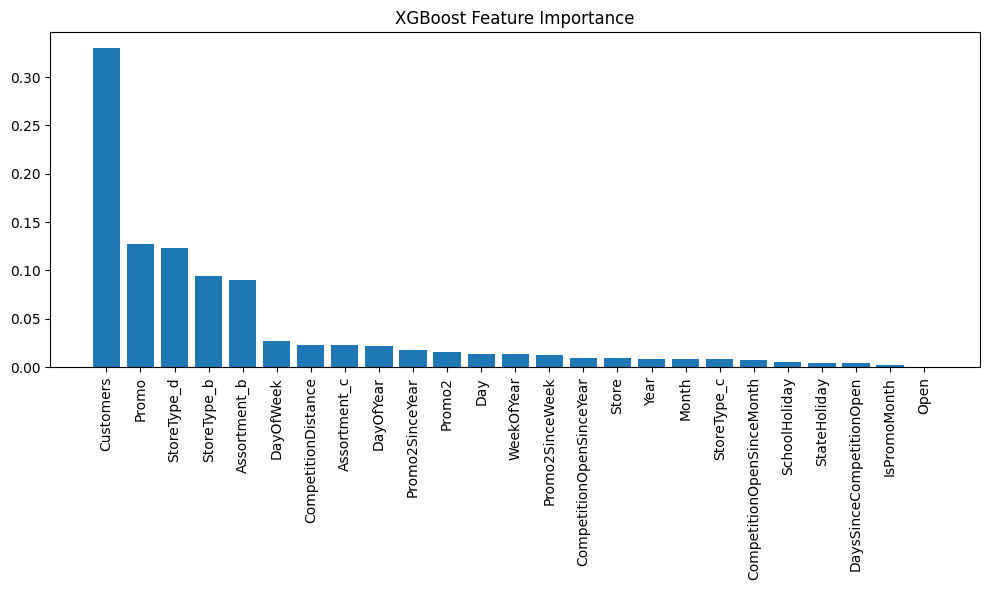

In [53]:
# Feature importance
importances = best_xgb.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.title("XGBoost Feature Importance")
plt.tight_layout()


plt.savefig('images/xgboost_feature_importance.png', dpi=200)
plt.show()



## Predicting Future Dates

In [54]:
future = pd.DataFrame([{
    "Store": 1,
    "DayOfWeek": 6,
    "Customers": 0,            # If unknown, set 0 or predicted separately
    "Open": 1,
    "Promo": 1,
    "StateHoliday": 0,
    "SchoolHoliday": 0,
    "CompetitionDistance": 1270,
    "CompetitionOpenSinceMonth": 9,
    "CompetitionOpenSinceYear": 2008,
    "Promo2": 0,
    "Promo2SinceWeek": 0,
    "Promo2SinceYear": 0,
    "Year": 2015,
    "Month": 8,
    "Day": 1,
    "WeekOfYear": 31,
    "DayOfYear": 213,
    "DaysSinceCompetitionOpen": 2525,
    "IsPromoMonth": 0,
    "StoreType_b": False,
    "StoreType_c": True,
    "StoreType_d": False,
    "Assortment_b": False,
    "Assortment_c": False
}])

prediction = best_xgb.predict(future)[0]
print("Predicted Sales:", prediction)


Predicted Sales: 2120.0825


# PLOTTING

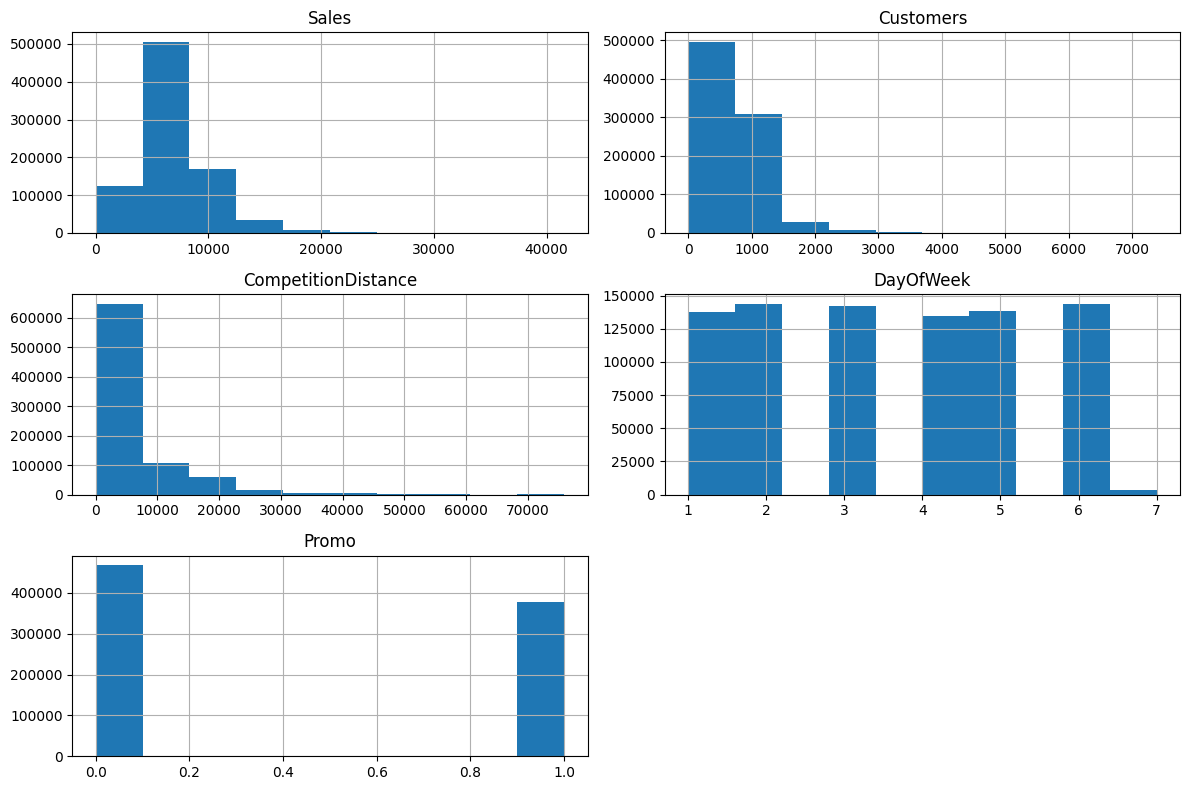

In [55]:
numeric_cols = ["Sales", "Customers", "CompetitionDistance", "DayOfWeek", "Promo"]

df[numeric_cols].hist(figsize=(12,8))
plt.tight_layout()
plt.savefig("images/numeric_cols.png", dpi=200)
plt.show()



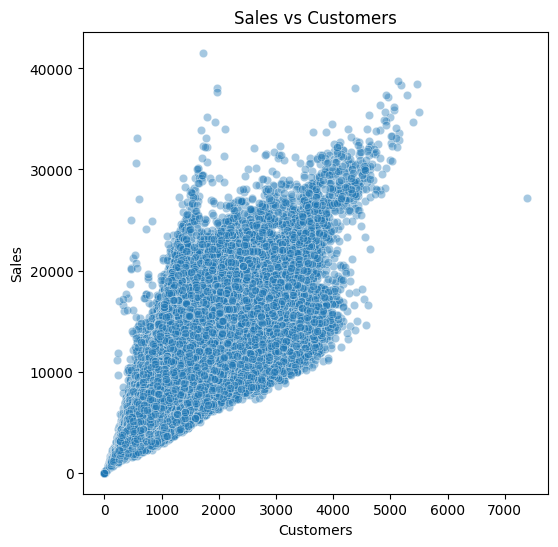

In [56]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x="Customers", y="Sales", alpha=0.4)
plt.title("Sales vs Customers")

plt.savefig("images/sales_vs_customers.png", dpi=200)
plt.show()


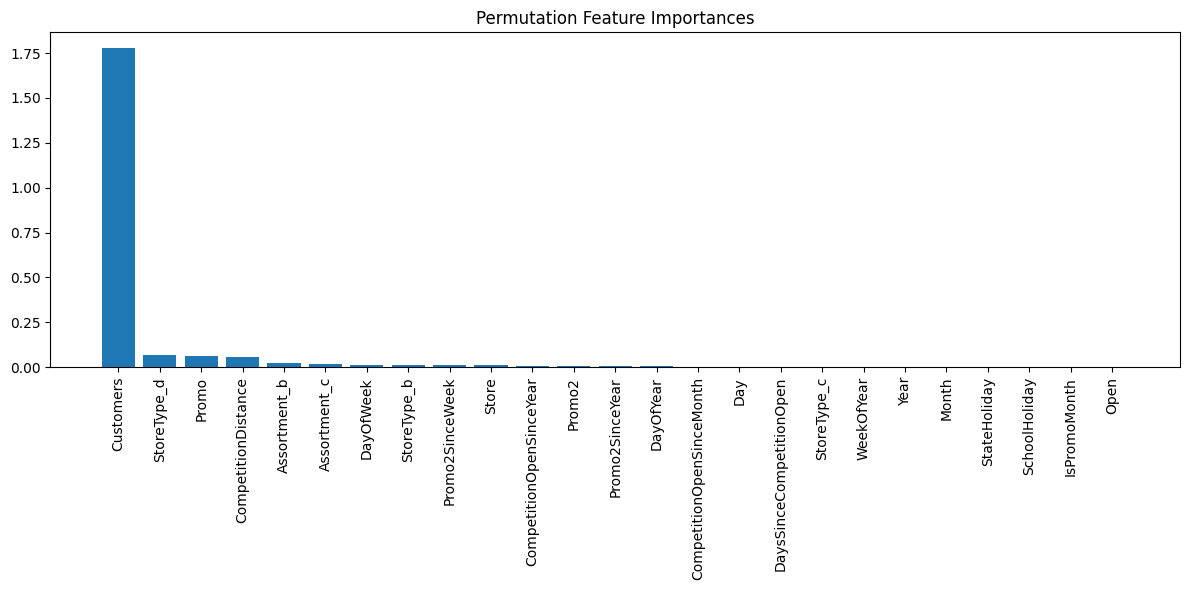

In [52]:
from sklearn.inspection import permutation_importance


sample_size = min(5000, len(X_test))  # max 5000 rows
X_small = X_test.sample(sample_size, random_state=42)
y_small = y_test.loc[X_small.index]

result = permutation_importance(model, X_small, y_small, n_repeats=5, random_state=42, n_jobs=-1)

importances = result.importances_mean
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Permutation Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(X_train.columns)[indices], rotation=90)
plt.tight_layout()
plt.savefig('images/permutation_feature_importances.png', dpi=200)
plt.show()

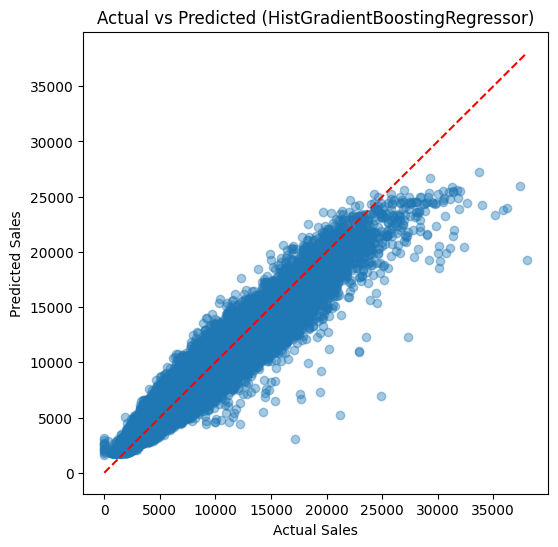

In [57]:
# Prediction vs Actual Scatter Plot

plt.figure(figsize=(6,6))
plt.scatter(y_test, model.predict(X_test), alpha=0.4)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted (HistGradientBoostingRegressor)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.savefig('images/rf_actual_vs_predicted.jpg', dpi=200)
plt.show()


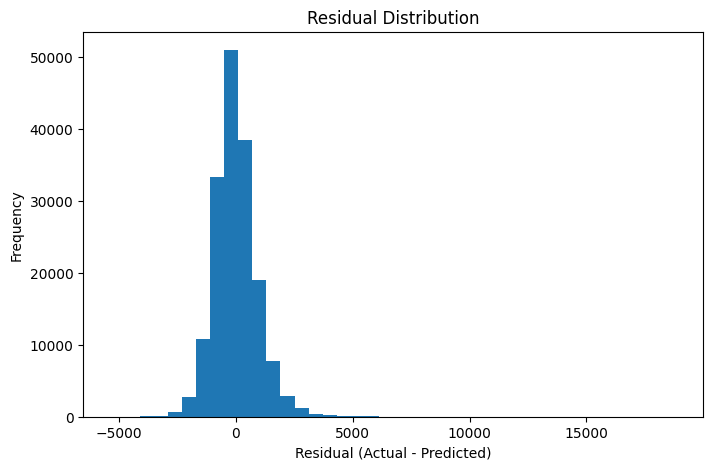

In [58]:
# Residual Histogram

residuals = y_test - model.predict(X_test)

plt.figure(figsize=(8,5))
plt.hist(residuals, bins=40)
plt.title("Residual Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")

plt.savefig('images/residual_distribution.png', dpi=200)
plt.show()


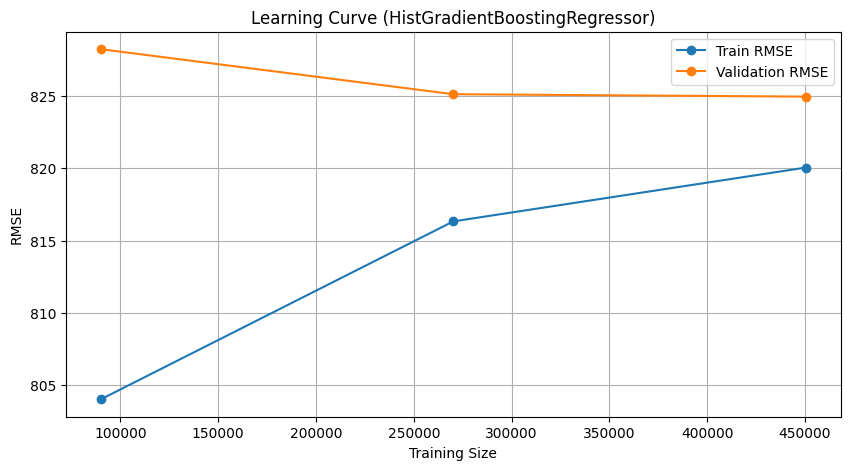

In [44]:
# Learning Curve (Using sklearn)
from sklearn.model_selection import learning_curve

small_model = HistGradientBoostingRegressor(
    max_iter=100,  # fewer trees
    max_depth=6,
    random_state=42
)

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=small_model,
    X=X_train,
    y=y_train,
    cv=3,                       # fewer folds
    scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.2, 1.0, 3),  # fewer points
    n_jobs=-1
)

# Compute RMSE from negative MSE
train_rmse = np.sqrt(-train_scores.mean(axis=1))
test_rmse = np.sqrt(-test_scores.mean(axis=1))

# Plot
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_rmse, marker='o', label="Train RMSE")
plt.plot(train_sizes, test_rmse, marker='o', label="Validation RMSE")
plt.title("Learning Curve (HistGradientBoostingRegressor)")
plt.xlabel("Training Size")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.savefig('images/learning_curve.png', dpi=200)  # Save before show
plt.show()

Linear Regression – Actual vs Predicted Plot

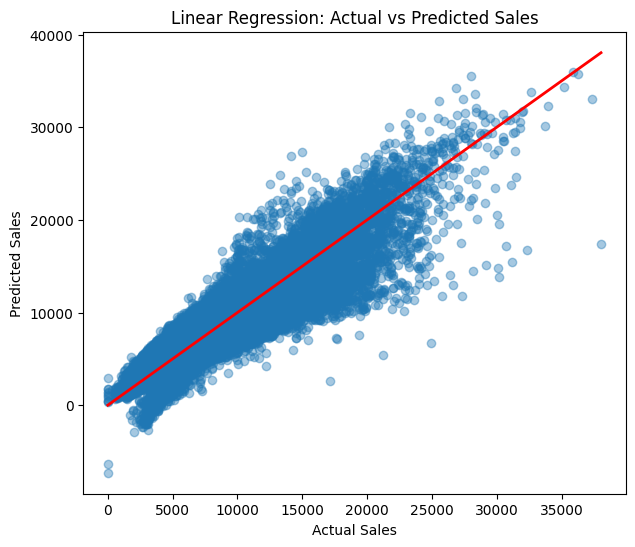

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.scatter(y_test, lr_preds, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # perfect prediction line

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs Predicted Sales")

plt.savefig('images/linear_regression_vs_actual_sales.png', dpi=200)
plt.show()


HistGradientBoostingRegressor – Actual vs Predicted Plot

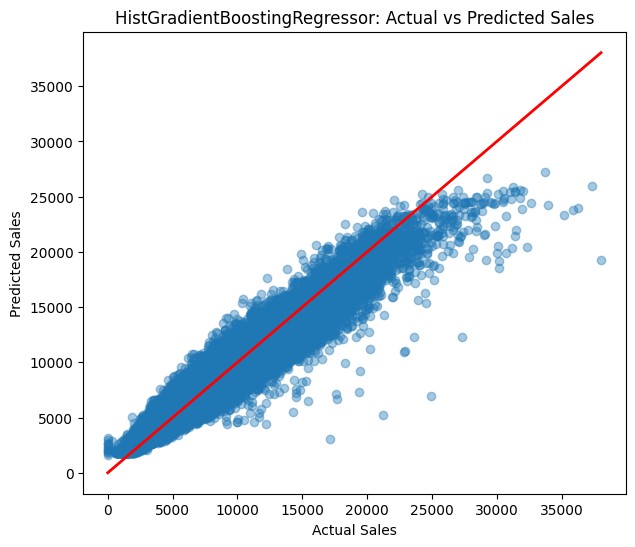

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.scatter(y_test, model_preds, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2)  # perfect prediction line

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("HistGradientBoostingRegressor: Actual vs Predicted Sales")

plt.savefig('images/HistGradientBoostingRegressor_vs_actual_sales.png', dpi=200)
plt.show()

XGBoost – Actual vs Predicted Plot

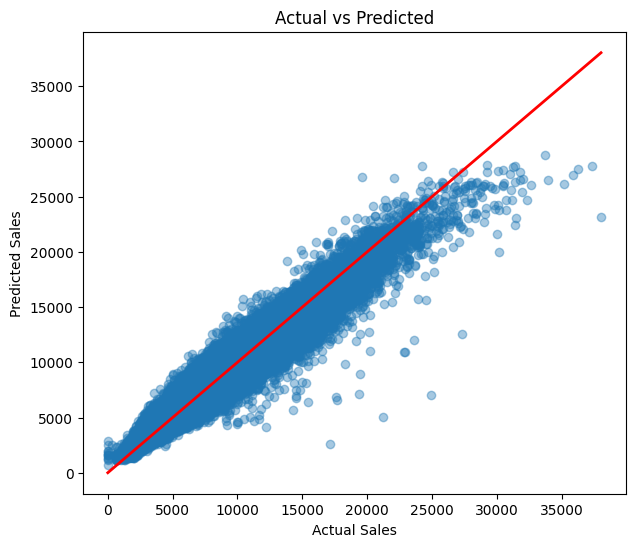

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.scatter(y_test, xgb_model_preds, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # red identity line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted")
plt.savefig("images/Actual_vs_PredicteXGB.png")
plt.show()
